FRIEDMAN_MSE
2 TRAIN:  0.4821697968234916 TEST:  0.4640032345861307
FRIEDMAN_MSE
3 TRAIN:  0.5958769102596969 TEST:  0.5728192931229565
FRIEDMAN_MSE
4 TRAIN:  0.6648643075178542 TEST:  0.6651184947758352
FRIEDMAN_MSE
5 TRAIN:  0.7076923838983846 TEST:  0.6982088069154125
FRIEDMAN_MSE
6 TRAIN:  0.7410310934236056 TEST:  0.7221835699086505
FRIEDMAN_MSE
7 TRAIN:  0.7592848305091594 TEST:  0.7389904083708875
FRIEDMAN_MSE
8 TRAIN:  0.772911309184144 TEST:  0.7482845404559911
FRIEDMAN_MSE
9 TRAIN:  0.7841840826087463 TEST:  0.7542998823684682
FRIEDMAN_MSE
10 TRAIN:  0.7947689631039158 TEST:  0.7614625724710361
FRIEDMAN_MSE
11 TRAIN:  0.8040994470840745 TEST:  0.7626091709902169
FRIEDMAN_MSE
12 TRAIN:  0.8118624929860344 TEST:  0.7665041999007669
FRIEDMAN_MSE
13 TRAIN:  0.8187894464537596 TEST:  0.7731986765648042
FRIEDMAN_MSE
14 TRAIN:  0.8249355917544067 TEST:  0.7815733484335269
FRIEDMAN_MSE
15 TRAIN:  0.8307446682726461 TEST:  0.7860637940663276
FRIEDMAN_MSE
16 TRAIN:  0.8357094897410321 

KeyboardInterrupt: 

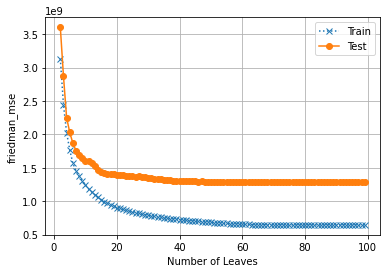

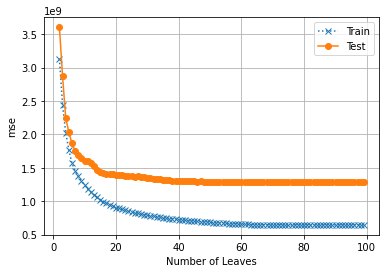

In [3]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

#Notiamo che il modello da un output migliore quando utilizziamo il parametro
# max_leaves a 59
#Inoltre notiamo che raggiunge diciamo un valore medio di 0.75utilizzando parametro 10 come massimo
#X_train.drop(columns=['Neighborhood_Score'], inplace=True)
#X_test.drop(columns=['Neighborhood_Score'], inplace=True)


dt_try = DecisionTreeRegressor()
criterions = ['friedman_mse', 'mse', 'mae']

for crit in criterions:
    errors = []
    for max_leaves in range(2,100):
        print(crit.upper())
        dt_model = DecisionTreeRegressor(max_leaf_nodes=max_leaves, max_depth=10, min_samples_leaf=15, splitter='best', criterion=crit, max_features='auto')
        #Posso anche modificare max depth
        dt_model.fit(X_train,y_train)
        # compute Accuracy
        print(max_leaves,"TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))


        train_acc = mean_squared_error(y_true=y_train, y_pred=dt_model.predict(X_train))
        test_acc  = mean_squared_error(y_true=y_test,  y_pred=dt_model.predict(X_test))

        errors += [ [max_leaves, train_acc, test_acc] ]

    errors = np.array(errors)

    fig, ax = plt.subplots()
    ax.plot(errors[:,0], errors[:,1], "x:", label="Train")
    ax.plot(errors[:,0], errors[:,2], "o-", label="Test")
    ax.set_ylabel(crit)
    ax.set_xlabel("Number of Leaves")
    ax.grid()
    ax.legend()

#Possiamo notare come la rimozione della feature Neighborhood score va a diminuire la precisione dell'algoritmo che inoltre deve andare "piu in profondità per migliorare"




## What do we need to build an Ensemble ?
""""
BaggingClassifier
o
AdaBoostClassifier

bagging riduce varianza
boosting riduce Bias

Controllare inoltre overfitting underfitting in base al numero di stimatori usati / numero massimo di foglie ecc ecc

RandomForestClassifier
teoricmanete usa bagging e boosting in automatico rispetto al decision tree
C'e anche random forest regressor (foglio 8)'
"""

In [5]:
from sklearn.model_selection import GridSearchCV
parameters={"splitter":["best","random"],
            "max_depth" : [None,1,3,5,7,9,11,12],
            "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
            "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3,0.4,0.5],
            "max_features":['auto','log2','sqrt',None],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

Fitting 5 folds for each of 38400 candidates, totalling 192000 fits
{'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 50, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
0.8116692021899914


In [73]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":["mae"],
            "splitter":["best"],
            "max_depth" : range(1,13),
            "min_samples_leaf":range(1,16),
            "max_features":['auto'],
            "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90]
            }

# calculating different regression metrics
reg_decision_model=DecisionTreeRegressor()
reg_decision_model.fit(X_train,y_train)

tuning_model=GridSearchCV(
    reg_decision_model,param_grid=parameters,
    scoring='r2'
    ,cv=5,
    verbose=2,n_jobs= -1)
# function for calculating how much time take for hyperparameter tuning

tuning_model.fit(X_train,y_train)
print(tuning_model.best_params_)
print(tuning_model.best_score_)

Fitting 5 folds for each of 1800 candidates, totalling 9000 fits


KeyboardInterrupt: 

In [56]:
#{'criterion': 'absolute_error', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 2, 'splitter': 'best'}
dt = DecisionTreeRegressor(criterion='friedman_mse' ,max_depth = 8, min_samples_leaf = 2,
splitter='best',max_features= 'auto', max_leaf_nodes= 80)
dt.fit(X_train,y_train)
print(dt.score(X_train,y_train))
print(dt.score(X_test,y_test))
print(dt.get_params())

""""
Let’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.
"""

0.9373998480887558
0.789493558351167
{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': 'auto', 'max_leaf_nodes': 80, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


'"\nLet’s say you have hundreds of features, then “best” splitter would be ideal because it will calculate the best features to split based on the impurity measure and use that to split the nodes, whereas if you choose “random” you have a high chance of ending up with features that don’t really give you that much information, which would lead to a more deeper less precise tree.\n'

In [28]:
tuning_model.cv_results_['mean_test_score'][tuning_model.best_index_]

0.8116692021899914

In [19]:
from sklearn.tree import DecisionTreeRegressor

X_train = pd.read_csv('x_train_preprocessed.csv')
X_test = pd.read_csv('x_test_preprocessed.csv')
y_train = pd.read_csv('y_train_preprocessed.csv')
y_test = pd.read_csv('y_test_preprocessed.csv')

errors = []
for n in range(25,50): #44-45 best one 43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
                        #43 TRAIN:  0.8609038365761572 TEST:  0.8278392417863291
                        dt_model = DecisionTreeRegressor(max_leaf_nodes=n, max_depth=9, min_samples_leaf=11, splitter='best', criterion='mae', max_features='auto', ccp_alpha=30.779753761969904)
    #Posso anche modificare max depth
    dt_model.fit(X_train,y_train)
    # compute Accuracy
    print(n, "TRAIN: ", dt_model.score(X_train, y_train), "TEST: ", dt_model.score(X_test,y_test))

25 TRAIN:  0.833520780731105 TEST:  0.8015452208147795
26 TRAIN:  0.838120356558195 TEST:  0.8124222980730429
27 TRAIN:  0.8394217898503925 TEST:  0.814961268325803
28 TRAIN:  0.8423875695929155 TEST:  0.8187474687123921
29 TRAIN:  0.8443538008725284 TEST:  0.8187050314434003
30 TRAIN:  0.8461368662740207 TEST:  0.8184497320765411
31 TRAIN:  0.8474908370823775 TEST:  0.8187150474874955
32 TRAIN:  0.8496899574096152 TEST:  0.8191816768293854
33 TRAIN:  0.8519111609639481 TEST:  0.822161410211486
34 TRAIN:  0.852987646943588 TEST:  0.8231771612334964
35 TRAIN:  0.8548341185769487 TEST:  0.8238149256703196
36 TRAIN:  0.8557848747950365 TEST:  0.8247216212827153
37 TRAIN:  0.8567775247251703 TEST:  0.825789193541398
38 TRAIN:  0.8579081465321216 TEST:  0.8260112328723745
39 TRAIN:  0.8584833860893437 TEST:  0.826219512494371
40 TRAIN:  0.858964371330623 TEST:  0.8267454419257269
41 TRAIN:  0.8598282257861276 TEST:  0.8270540826611431
42 TRAIN:  0.8603695229947682 TEST:  0.827490297026501
4

Non notiamo ulteriori miglioramenti utilizzando ccp_alpha, dato che abbiamo gia limitato l'overfitting con i parametri max_depth e min_samples_leaf